# Rohan Khaitan MDS201812

# Wine Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import os


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("/home/rohan/CMI/SEM 2/AML/Wine/wineuci")

In [4]:
data_raw=pd.read_csv('Wine.csv', encoding = 'Latin-1')

In [5]:
data_raw.shape

(177, 14)

In [6]:
data_raw.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [7]:
data_raw['1'].unique()

array([1, 2, 3])

In [8]:
data=data_raw.drop(['1'],axis=1)

In [9]:
data.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [10]:
#data.isnull().any()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
14.23    177 non-null float64
1.71     177 non-null float64
2.43     177 non-null float64
15.6     177 non-null float64
127      177 non-null int64
2.8      177 non-null float64
3.06     177 non-null float64
.28      177 non-null float64
2.29     177 non-null float64
5.64     177 non-null float64
1.04     177 non-null float64
3.92     177 non-null float64
1065     177 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.1 KB


In [11]:
data.shape

(177, 13)

# k-means Clustering

K-means clustering is a type of unsupervised learning, which is used when we have unlabeled data
(i.e., data without defined categories or groups). The goal of this algorithm is to find groups in
the data,with the number of groups represented by the variable K. The algorithm works iteratively 
to assign each data point to one of K groups based on the features that are provided. Data points
are clustered based on feature similarity. 

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data)
kmeans.cluster_centers_.shape

(3, 13)

In [13]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_raw['1'][mask])[0]

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(data_raw['1'],labels )

0.7005649717514124

In [15]:
#Silhouette refers to a method of interpretation and validation of consistency within clusters of data. 
#The technique provides a succinct graphical representation of how well each object one cluster.

#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other
#clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is 
#well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value,
#then the clustering configuration is appropriate. If many points have a low or negative value, then the 
#custering configuration may have too many or too few clusters.

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(data,labels )

0.5709784028530243

In [17]:
#Heatmap of Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(data_raw['1'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(0,3),
            yticklabels=range(0,3))
plt.xlabel('true label')
plt.ylabel('predicted label');


# Dimensionality Reduction
# PCA

In [18]:
#Though the Wine dataset doesn't contain a lot of features but in most of the cases where the data contains
#a lot of features we need dimensionality reduction.
#Some benefits of dimensionality reduction include less computation/training time and re-moving multicollinearity 
#by eliminating redundant features. It also helps in visualising multidimensional data.

In [19]:
#Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a
#set of observations of possibly correlated variables (entities each of which takes on various numerical values)
#into a set of values of linearly uncorrelated variables called principal components.
#It uses the Singular Value Decomposition(SVD) technique.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data_scaled)
                    
data_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_raw['1'][mask])[0]

# Compute the accuracy
accuracy_score(data_raw['1'], labels)

/home/rohan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/rohan/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.9661016949152542

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(data,labels )

0.18854003246674986

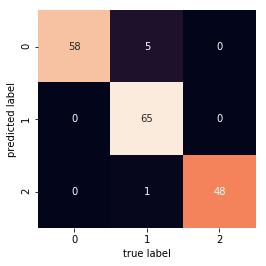

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(data_raw['1'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(0,3),
            yticklabels=range(0,3))
plt.xlabel('true label')
plt.ylabel('predicted label');


# t-SNE

In [23]:
#Another dimensionality reduction Tehnique is TSNE
#t-Distributed Stochastic Neighbor Embedding (t-SNE) is a (prize-winning) technique for dimensionality reduction 
#that is particularly well suited for the visualization of high-dimensional datasets.

In [24]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
data_proj = tsne.fit_transform(data)

# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(data_raw['1'][mask])[0]

# Compute the accuracy
accuracy_score(data_raw['1'], labels)

0.711864406779661

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(data,labels )

0.5239835952594412

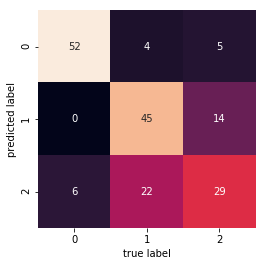

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(data_raw['1'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(0,3),
            yticklabels=range(0,3))
plt.xlabel('true label')
plt.ylabel('predicted label');


# Visualization

In [27]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

ready


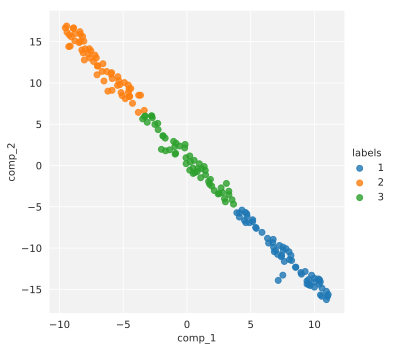

In [28]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(data_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj,fit_reg=False)
print("ready")
